# P4 : Réalisation d'une étude de santé publique avec R ou Python



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importation des librairies

In [2]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<0.1','0').astype("float")
population = pd.read_csv('population.csv')
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].fillna(0)
dispo_alimentaire['Aliments pour animaux)'] = dispo_alimentaire['Aliments pour animaux'].fillna(0)
dispo_alimentaire['Disponibilité intérieure)'] = dispo_alimentaire['Disponibilité intérieure'].fillna(0)
dispo_alimentaire['Pertes)'] = dispo_alimentaire['Pertes'].fillna(0)
dispo_alimentaire['Nourriture)'] = dispo_alimentaire['Nourriture'].fillna(0)
sous_nutrition.columns = ['Zone','Année','pop_sous_nutrition']
sous_nutrition['pop_sous_nutrition'] = sous_nutrition['pop_sous_nutrition']*1000000
population.columns = ['Zone','Année','pop_totale']
population['pop_totale'] = population['pop_totale']*1000

# importation des données
# on a changé les noms de quelques colonnes et remplacé les valeurs vides et les chaînes de caractères par 0



##  Les  requêtes pour Marc

### la proportion de personnes en état de sous-nutrition

In [3]:
nb_pop_sous_nutrition = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', 'pop_sous_nutrition'].sum() 
nb_pop = population.loc[population['Année'] == 2017, 'pop_totale'].sum()
proportion_sous_nutrition = (nb_pop_sous_nutrition*100/nb_pop).round()
print('la proportion de personnes en état de sous-nutrition est de ', proportion_sous_nutrition,'%')

# on a selectionné le nombre de la population en sous nutrition en 2017
# on a selectionné le nombre de la population totale en 2017
# la division du nombre de la population en sous_nutrition sur le nombre de la population totale nous donne la proportion de personnes en état de sous-nutrition


la proportion de personnes en état de sous-nutrition est de  7.0 %


Text(0.5, 1.0, 'la proportion de personnes en état de sous-nutrition')

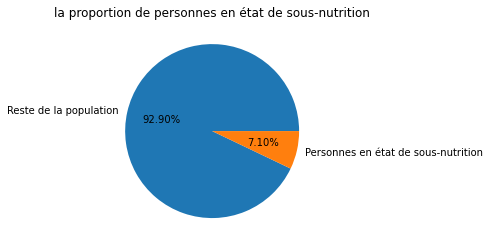

In [4]:
data=[(nb_pop-nb_pop_sous_nutrition),nb_pop_sous_nutrition]
labels=['Reste de la population','Personnes en état de sous-nutrition']
plt.pie(data, labels=labels, autopct='%.2f%%')
plt.title('la proportion de personnes en état de sous-nutrition')

### Le nombre théorique de personnes qui pourraient être nourries

In [5]:

dispo_aliment_pays = dispo_alimentaire.groupby('Zone')[ 'Disponibilité alimentaire (Kcal/personne/jour)'].sum()
Population2017 = population.loc[population['Année'] == 2017, ('pop_totale','Zone')]
df_dispo_pays = pd.merge(dispo_aliment_pays, Population2017, on='Zone')
nb_theorique_personnes_nourries=(df_dispo_pays['pop_totale']* df_dispo_pays["Disponibilité alimentaire (Kcal/personne/jour)"]/(2500)).sum().round()
print(nb_theorique_personnes_nourries,'est le nombre théorique de personnes qui pourraient être nourries ')

# on a calculé la somme de la disponibilité alimentaire groupée par pays et stocké le résultat dans une variable
# et réalisé une jointure entre la variable et la table population filtré sur les valeur de l'année 2017 en utilisant 'Zone' comme clé
# dans le dataframe obtenu par la jointure , on calculé la somme de la multiplication du nombre de population et le nombre de disponibilité alimentaire pour chaque pays

8367593851.0 est le nombre théorique de personnes qui pourraient être nourries 


In [6]:
df_dispo_pays

,Zone,Disponibilité alimentaire (Kcal/personne/jour),pop_totale
0,Afghanistan,2087.0,36296113.0
1,Afrique du Sud,3020.0,57009756.0
2,Albanie,3188.0,2884169.0
3,Algérie,3293.0,41389189.0
4,Allemagne,3503.0,82658409.0
...,...,...,...
167,Émirats arabes unis,3275.0,9487203.0
168,Équateur,2346.0,16785361.0
169,États-Unis d'Amérique,3682.0,325084756.0
170,Éthiopie,2129.0,106399924.0


### Le nombre théorique de personnes qui pourraient être nourries en disponibilité vegetale

In [7]:
Dispo_Vegetal = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale', ('Disponibilité alimentaire (Kcal/personne/jour)','Zone')]
Dispo_Vegetal_Pays = Dispo_Vegetal.groupby('Zone')[ 'Disponibilité alimentaire (Kcal/personne/jour)'].sum()
Population2017 = population.loc[population['Année'] == 2017, ('pop_totale','Zone')]
df_Dispo_Vegetal = pd.merge(Dispo_Vegetal_Pays, Population2017 , on='Zone')
nb_theorique_personnes_nourries_vegetale=(df_Dispo_Vegetal['pop_totale']* df_Dispo_Vegetal["Disponibilité alimentaire (Kcal/personne/jour)"]/2500).sum().round()
print(nb_theorique_personnes_nourries_vegetale,'est le nombre théorique de personnes qui pourraient être nourries  en disponibilité vegetale   ')

# même démarche que la requête précédente, juste on ajoute la condition 'vegetale à la colonne 'Origine' quand on a effectué la somme des disponibilité alimentaire groupé par pays
# 6904305685.0

6904305685.0 est le nombre théorique de personnes qui pourraient être nourries  en disponibilité vegetale   


### Quelques proportions par rapport à l'utilisation de la disponibilité intérieure

In [8]:
disponibilité_intérieure = dispo_alimentaire['Disponibilité intérieure'].sum()
dispo_aliments_animaux = dispo_alimentaire['Aliments pour animaux'].sum()
dispo_pertes = dispo_alimentaire['Pertes'].sum()
dispo_nourriture = dispo_alimentaire['Nourriture'].sum()
proportion_dispo_aliments_animaux = (dispo_aliments_animaux*100/disponibilité_intérieure).round()
print('l’alimentation animale presente', proportion_dispo_aliments_animaux,'% de l’utilisation de la disponibilité intérieure ')
proportion_dispo_pertes = (dispo_pertes*100/disponibilité_intérieure).round()
print('les pertes presentent', proportion_dispo_pertes,'% de l’utilisation de la disponibilité intérieure ')
proportion_dispo_nourriture = (dispo_nourriture*100/disponibilité_intérieure).round()
print('la nourriture presente', proportion_dispo_nourriture,'% de l’utilisation de la disponibilité intérieure ')

# on a calculé la somme des quantité utilisé pour l'alimentation humaine et animales ainsi que les pertes, et en divisant chacune sur la disponibilité intérieure, on obtient les proportions.
# dispo interieur = alimentaion animal + pertes + semences + nourriture + traitement


l’alimentation animale presente 13.0 % de l’utilisation de la disponibilité intérieure 
les pertes presentent 5.0 % de l’utilisation de la disponibilité intérieure 
la nourriture presente 50.0 % de l’utilisation de la disponibilité intérieure 


Text(0.5, 1.0, 'utilisation de la disponibilité intérieure')

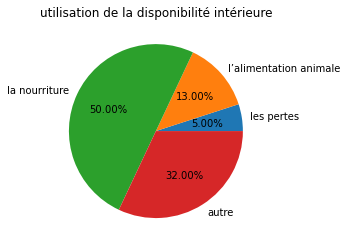

In [9]:
data=[proportion_dispo_pertes,proportion_dispo_aliments_animaux,proportion_dispo_nourriture,32]
labels=['les pertes','l’alimentation animale','la nourriture','autre']
plt.pie(data, labels=labels, autopct='%.2f%%')
plt.title('utilisation de la disponibilité intérieure')

##  Les  requêtes pour Mélanie

### La proportion de personnes sous-alimentées, la plus forte en 2017

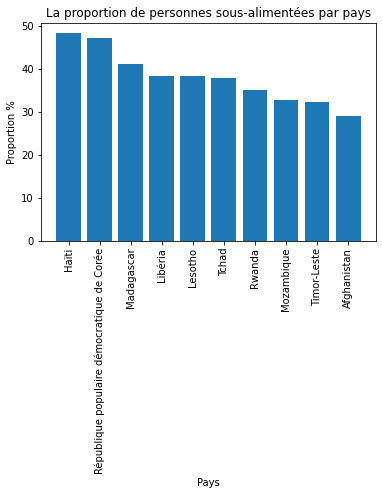

Zone
Haïti                                         48.0
République populaire démocratique de Corée    47.0
Madagascar                                    41.0
Libéria                                       38.0
Lesotho                                       38.0
                                              ... 
Kazakhstan                                     0.0
Japon                                          0.0
Italie                                         0.0
Israël                                         0.0
Îles Salomon                                   0.0
Name: pourcentage, Length: 203, dtype: float64

In [10]:

nb_pop_sous_nutrition_2017= sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', ('pop_sous_nutrition','Année','Zone')]
nb_pop_totale_2017 = population.loc[population['Année'] == 2017, ('pop_totale','Zone')]
fusion_population_sous_nutrition = pd.merge(nb_pop_sous_nutrition_2017, nb_pop_totale_2017, on='Zone')
fusion_population_sous_nutrition['pourcentage']= (fusion_population_sous_nutrition['pop_sous_nutrition']*100)/fusion_population_sous_nutrition['pop_totale']
fusion_population_sous_nutrition.sort_values('pourcentage', ascending = False)
fusion_population_sous_nutrition.groupby('Zone')[ 'pourcentage'].sum().sort_values(ascending   = False)

data_sorted = fusion_population_sous_nutrition.sort_values('pourcentage', ascending=False).head(10)
plt.bar(data_sorted['Zone'], data_sorted['pourcentage'])
plt.xticks(rotation=90)
plt.title('La proportion de personnes sous-alimentées par pays')
plt.xlabel("Pays")
plt.ylabel("Proportion %")
plt.show()
fusion_population_sous_nutrition.groupby('Zone')[ 'pourcentage'].sum().sort_values(ascending   = False).round()

# on a joint la table population et sous nutrition avec la clé 'zone',
# sur les deux tables, on a mis la condition année 2017 avant de les joindre
# la division du nombre de population en sous-nutrition sur le nombre de population totale pour chaque pays nous donne le pourcentage de personnes sous-alimentes
# on a classé le résultat par ordre descendant

### les pays qui ont le plus bénéficié d’aide depuis 2013

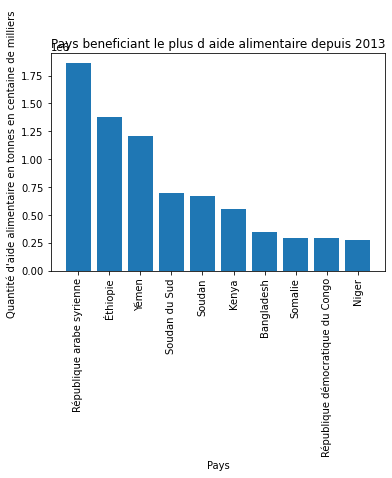

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


In [11]:

plus_aide_alimentaire = aide_alimentaire.groupby('Pays bénéficiaire',as_index= False)[ 'Valeur'].sum()
data_sorted1 = plus_aide_alimentaire.sort_values('Valeur', ascending=False).head(10)
plt.bar(data_sorted1['Pays bénéficiaire'], data_sorted1['Valeur'])
plt.xticks(rotation=90)
plt.title('Pays beneficiant le plus d aide alimentaire depuis 2013')
plt.xlabel("Pays")
plt.ylabel("Quantité d'aide alimentaire en tonnes en centaine de milliers ")
plt.show()

# on a calculé la somme des valeurs d'aide pour chaque pays
# les résultats sont classé par ordre décroissant

data_sorted1

In [12]:
plus_aide_alimentaire

,Pays bénéficiaire,Valeur
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666
...,...,...
71,Zambie,3026
72,Zimbabwe,62570
73,Égypte,1122
74,Équateur,1362


### les pays ayant le moins de disponibilité/habitant

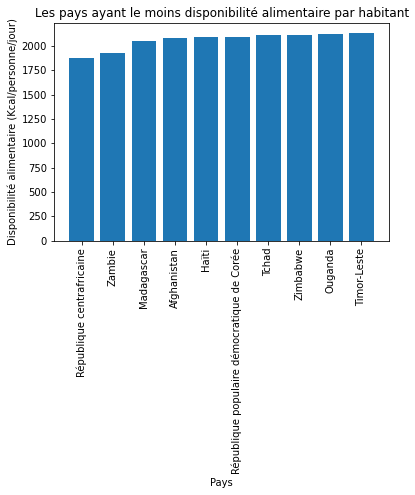

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


In [13]:

moins_dispo_alimentaire = dispo_alimentaire.groupby('Zone',as_index= False)[ 'Disponibilité alimentaire (Kcal/personne/jour)'].sum()
data_sorted2 = moins_dispo_alimentaire.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)
plt.bar(data_sorted2['Zone'], data_sorted2['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xticks(rotation=90)
plt.title('Les pays ayant le moins disponibilité alimentaire par habitant')
plt.xlabel("Pays")
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.show()
data_sorted2[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].head(10)

# on a calculé la somme des disponibilités alimentaires groupée par pays, et on a classé les résultats par ordre croissant. 


### les pays ayant le plus de disponibilité/habitant

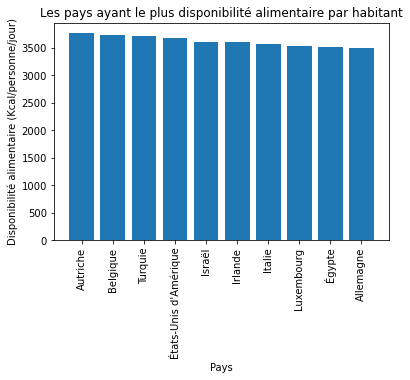

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


In [14]:

plus_dispo_alimentaire = dispo_alimentaire.groupby('Zone',as_index= False)[ 'Disponibilité alimentaire (Kcal/personne/jour)'].sum()
data_sorted3 = moins_dispo_alimentaire.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
plt.bar(data_sorted3['Zone'], data_sorted3['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xticks(rotation=90)
plt.title('Les pays ayant le plus disponibilité alimentaire par habitant')
plt.xlabel("Pays")
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.show()

data_sorted3[0:10]

# on a calculé la somme des disponibilités alimentaires groupée par pays, et on a classé les résultats par ordre décroissant. 

### Proportion de l'exportation de l'ukraine et de la russie de blé

In [15]:

export_blé_ukraine_russie = dispo_alimentaire.loc[((dispo_alimentaire['Zone'].isin(('Fédération de Russie','Ukraine'))  ) &( dispo_alimentaire['Produit'] == 'Blé')), ('Exportations - Quantité','Zone')].sum()
export_blé = dispo_alimentaire.loc[dispo_alimentaire['Produit'] == 'Blé', ('Exportations - Quantité','Zone')].sum()
prop_export_russie_ukraine_blé = export_blé_ukraine_russie['Exportations - Quantité']*100/export_blé['Exportations - Quantité']
print((prop_export_russie_ukraine_blé).round(),"% est la proportion de l'exportation de l'ukraine et de la russie de blé par rapport à l'exportation mondial ")            

# on calculé la somme des exportation de blé de l'Ukraine et de la Russie on utilisant deux conditions
# la division du résultat obtenu sur la somme des exportations totale du blé, on obtient la proportion l'exportation de ces deux pays.

11.0 % est la proportion de l'exportation de l'ukraine et de la russie de blé par rapport à l'exportation mondial 


Text(0.5, 1.0, 'Proportion de l exportation de l Ukraine et de la Russie de blé')

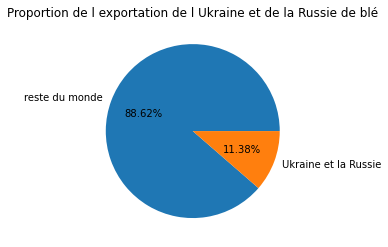

In [16]:
dataExportBléRuUkr=[(export_blé['Exportations - Quantité']-export_blé_ukraine_russie['Exportations - Quantité']),export_blé_ukraine_russie['Exportations - Quantité']]
labels=['reste du monde','Ukraine et la Russie']
plt.pie(dataExportBléRuUkr, labels=labels, autopct='%.2f%%')
plt.title('Proportion de l exportation de l Ukraine et de la Russie de blé')

### Pertes en milliers de tonnes par pays

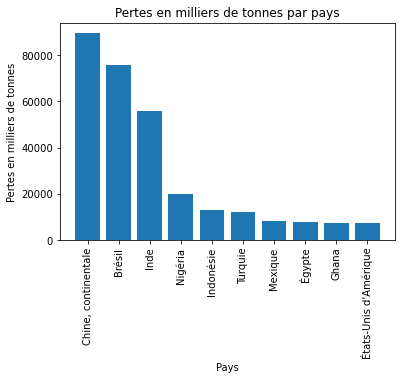

,Zone,Pertes
36,"Chine, continentale",89575.0
23,Brésil,75914.0
68,Inde,55930.0
108,Nigéria,19854.0
69,Indonésie,13081.0
159,Turquie,12036.0
100,Mexique,8289.0
168,Égypte,7608.0
57,Ghana,7442.0
171,États-Unis d'Amérique,7162.0


In [17]:
Pertes_Pays = dispo_alimentaire.groupby('Zone',as_index= False)[ 'Pertes'].sum()                             
data_sorted9 = Pertes_Pays.sort_values('Pertes', ascending=False).head(10)
plt.bar(data_sorted9['Zone'], data_sorted9['Pertes'])

plt.xticks(rotation=90)
plt.title('Pertes en milliers de tonnes par pays')
plt.xlabel("Pays")
plt.ylabel("Pertes en milliers de tonnes")
plt.show()

# on a selectionné les pays avec le plus de pertes de dispo_alimentaire

data_sorted9[0:20] 



### Proportion des pertes par rapport à la disponibilité interieure par pays

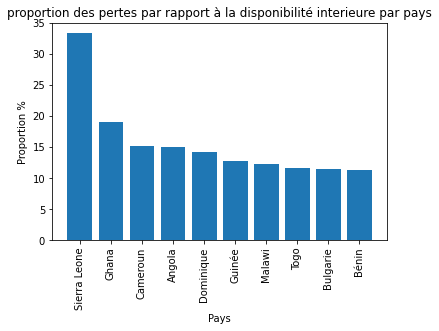

,Zone,proportion perts/disponibilité_int en %
141,Sierra Leone,33.0
57,Ghana,19.0
30,Cameroun,15.0
5,Angola,15.0
46,Dominique,14.0
61,Guinée,13.0
93,Malawi,12.0
155,Togo,12.0
24,Bulgarie,12.0
27,Bénin,11.0


In [18]:
Pertes_Pays = dispo_alimentaire.groupby('Zone',as_index= False)[ 'Pertes'].sum()
dispo_Aliment_Pays= dispo_alimentaire.groupby('Zone',as_index= False)[ 'Disponibilité intérieure'].sum()
fusion_dispoAliment_pertes_pays= pd.merge(Pertes_Pays, dispo_Aliment_Pays, on='Zone')
fusion_dispoAliment_pertes_pays['proportion perts/disponibilité_int en %']=fusion_dispoAliment_pertes_pays['Pertes']*100/fusion_dispoAliment_pertes_pays['Disponibilité intérieure']
fusion_dispoAliment_pertes_pays
datasorted9= fusion_dispoAliment_pertes_pays.sort_values('proportion perts/disponibilité_int en %', ascending=False).head(10)
datasorted9
plt.bar(datasorted9['Zone'], datasorted9['proportion perts/disponibilité_int en %'])
plt.xticks(rotation=90)
plt.title('proportion des pertes par rapport à la disponibilité interieure par pays')
plt.xlabel("Pays")
plt.ylabel("Proportion %")
plt.show()
datasorted9[['Zone','proportion perts/disponibilité_int en %']].round().head(10)

# on remarque que des pays qui souffre déjà de la famine ont de grande proportion de pertes par rapport à leur disponibilité intérieur

##  Les requêtes en rapport avec Julien

### l’utilisation des céréales, notamment la répartition entre l’alimentation humaine  et l’alimentation pour animaux

In [19]:
cereales=['Riz','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres','Blé']
dispo_interieur_cereale=dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(cereales), ('Disponibilité intérieure')].sum()
aliments_animaux=dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(cereales), ('Aliments pour animaux')].sum()
pourcentage_aliments_animeaux = (aliments_animaux*100/dispo_interieur_cereale).round()
pourcentage_aliments_animeaux
print('l utilisation des céréales en alimentation animales présentent',pourcentage_aliments_animeaux,'% de la disponibilité intérieur total des cereales')

l utilisation des céréales en alimentation animales présentent 43.0 % de la disponibilité intérieur total des cereales


In [20]:
nourriture=dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(cereales), ('Nourriture')].sum()
pourcentage_aliments_nourriture=(nourriture*100/dispo_interieur_cereale).round()
pourcentage_aliments_nourriture
print('l utilisation des céréales en nourriture présentent',pourcentage_aliments_nourriture,'% de la disponibilité intérieur total des cereales')

l utilisation des céréales en nourriture présentent 34.0 % de la disponibilité intérieur total des cereales


Text(0.5, 1.0, 'utilisation des céréales')

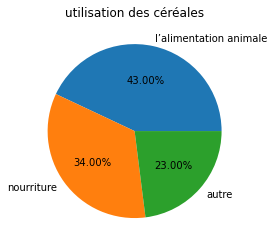

In [21]:
data_thailande=[pourcentage_aliments_animeaux,pourcentage_aliments_nourriture,100-pourcentage_aliments_nourriture-pourcentage_aliments_animeaux]
labels=['l’alimentation animale','nourriture','autre']
plt.pie(data_thailande, labels=labels, autopct='%.2f%%')
plt.title('utilisation des céréales')

# dispo interieur =importation+ production + variation de stock
# dispo interieur = alimentaion animal + pertes + semences + nourriture+traitement + autre utilisations


### utilisation du manioc par la Thaïlande

In [22]:
production_moniac_thai=dispo_alimentaire.loc[(dispo_alimentaire['Produit']==('Manioc')) & ( dispo_alimentaire['Zone'] == 'Thaïlande'), ('Production')].sum()
exportation_moniac_thai=dispo_alimentaire.loc[(dispo_alimentaire['Produit']==('Manioc')) & ( dispo_alimentaire['Zone'] == 'Thaïlande'), 'Exportations - Quantité'].sum()
exportation_moniac_thai*100/production_moniac_thai

print((exportation_moniac_thai*100/production_moniac_thai).round(),'% de la production du manioc en Thailande est dediée à l exportation')

83.0 % de la production du manioc en Thailande est dediée à l exportation


In [23]:
nb_pop_sous_nutrition_thai = sous_nutrition.loc[(sous_nutrition['Année'] == '2016-2018')& ( sous_nutrition['Zone'] == 'Thaïlande'), 'pop_sous_nutrition'].sum() 
print(nb_pop_sous_nutrition_thai,'est le nombre personnes en sous_nutrition en Thailande')

# le Thaïlande exporte une grande quantité de nourriture alors que 6 millions de personnes dans ce pays soufrent de sous-nutrition.

6200000.0 est le nombre personnes en sous_nutrition en Thailande
